In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 


In [2]:
MONGO_DB_URI = "mongodb://localhost:27017"
from dataset import getFeaturesFromDBData

df = getFeaturesFromDBData(MONGO_DB_URI)

User 21630333 (BOT) has no tweets in the database
User 22036045 (HUMAN) has no tweets in the database
User 22730529 (HUMAN) has no tweets in the database
User 23220415 (BOT) has no tweets in the database
User 23223395 (HUMAN) has no tweets in the database
User 23222867 (BOT) has no tweets in the database
User 23224336 (BOT) has no tweets in the database
User 23258087 (BOT) has no tweets in the database
User 23258968 (BOT) has no tweets in the database
User 25070587 (HUMAN) has no tweets in the database
User 23272942 (BOT) has no tweets in the database
User 24221453 (BOT) has no tweets in the database
User 31626280 (HUMAN) has no tweets in the database
User 25008627 (BOT) has no tweets in the database
User 25292754 (BOT) has no tweets in the database
User 33114252 (BOT) has no tweets in the database
User 37193429 (BOT) has no tweets in the database
User 37967468 (BOT) has no tweets in the database
User 43624887 (BOT) has no tweets in the database
User 49548467 (BOT) has no tweets in the

In [5]:
df.describe()

,days_since_creation,has_bot_word_in_descriptionbot_word_in_description,has_bot_word_in_descriptionnot_bot_word_in_description,has_bot_word_in_namebot_word_in_name,has_bot_word_in_namenot_bot_word_in_name,has_bot_word_in_screen_namebot_word_in_screen_name,has_bot_word_in_screen_namenot_bot_word_in_screen_name,numbers_in_name,numbers_in_screen_name,user_description_length,...,statistics_of_their_retweets_median,statistics_of_their_retweets_std,statistics_of_their_retweets_skew,statistics_of_their_retweets_kurtosis,statistics_of_their_retweets_entropy,tweet_retweet_ratio,unique_mentions_rate,get_average_age_difference_in_retweets,number_of_accounts_retweeted,label
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.0,2400.000000,2400.000000
mean,3929.639583,0.003750,0.996250,0.000833,0.999167,0.000833,0.999167,0.015417,0.172083,67.364167,...,1678.648125,7876.936892,1.321716,6.715745,0.800592,86.868978,0.131536,0.0,14.145417,0.486667
std,669.443119,0.061135,0.061135,0.028861,0.028861,0.028861,0.028861,0.147834,0.389488,50.440146,...,16748.828901,36217.096564,2.259123,18.854699,1.230097,84.309605,0.168845,0.0,27.510552,0.499926
min,2379.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.747108,-3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,3367.500000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.122940,0.000000,0.0,0.000000,0.000000
50%,3979.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.060000,0.0,0.000000,0.000000
75%,4504.250000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,110.000000,...,57.125000,1747.672808,2.160179,3.670993,1.419701,199.000000,0.238000,0.0,12.000000,1.000000
max,5613.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,160.000000,...,514016.000000,869197.861603,13.695076,186.032120,5.240392,200.000000,1.525000,0.0,165.000000,1.000000


In [6]:
#standardize the data to normal distribution
import pandas as pd 

from sklearn import preprocessing
df_std = preprocessing.scale(df)
df_std = pd.DataFrame(df_std)

In [7]:
df_std

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,2.444870,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,-0.760746,...,-0.099947,-0.202046,2.203312,2.012127,1.285626,-1.017584,1.957615,0.0,1.594433,1.027032
1,2.515092,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,1.400681,...,-0.099947,-0.206330,1.986506,1.711452,1.508197,-1.016204,0.500352,0.0,1.230860,-0.973680
2,2.356719,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,0.349712,...,-0.098394,0.889704,2.769844,2.679239,0.143541,-1.007022,1.856910,0.0,1.594433,1.027032
3,2.456823,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,1.797273,...,-0.099529,-0.217371,-0.405214,-0.414566,0.557397,-0.567894,-0.305290,0.0,-0.441574,-0.973680
4,1.841258,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,-0.721087,...,-0.085495,0.379255,2.090474,1.815425,1.816643,-1.028661,-0.435614,0.0,4.248513,1.027032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-1.359084,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,-0.502962,...,-0.085197,-0.144513,-0.274211,-0.435831,-0.506603,-0.646985,1.057192,0.0,-0.405217,-0.973680
2396,-0.074166,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,-1.335805,...,-0.100246,-0.217538,-0.585179,-0.356258,-0.650972,1.330268,-0.749577,0.0,-0.514289,1.027032
2397,-1.360578,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,-0.441912,-1.117679,...,-0.100246,-0.217538,-0.585179,-0.356258,-0.650972,0.215098,0.743229,0.0,-0.514289,-0.973680
2398,-0.077154,-0.061352,0.061352,-0.02888,0.02888,-0.02888,0.02888,-0.104306,2.126099,-1.335805,...,-0.100246,-0.217538,-0.585179,-0.356258,-0.650972,1.330268,-0.779196,0.0,-0.514289,1.027032


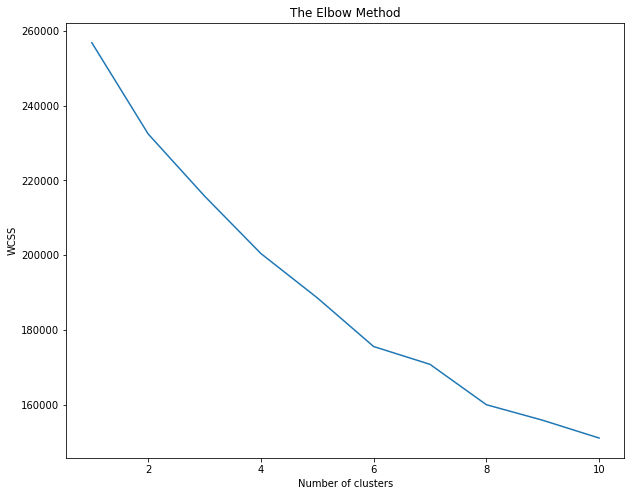

In [8]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_std)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df_std['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df_std.groupby('cluster').mean(),1))
kmeans_mean_cluster

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
cluster,,,,,,,,,,,,,,,,,,,,,
1,-0.1,-0.1,0.1,-0.0,0.0,-0.0,0.0,-0.0,0.1,0.0,...,-0.1,-0.2,-0.4,-0.2,-0.4,1.0,-0.5,0.0,-0.3,0.1
2,-0.0,-0.1,0.1,0.1,-0.1,0.1,-0.1,0.1,0.1,-0.6,...,0.0,-0.1,0.1,-0.1,0.3,-0.4,-0.3,0.0,-0.1,-0.1
3,-0.2,0.1,-0.1,-0.0,0.0,0.0,-0.0,0.0,-0.1,0.1,...,0.0,0.2,0.5,0.3,0.4,-0.4,0.5,0.0,0.4,-0.5
4,0.5,-0.0,0.0,0.1,-0.1,-0.0,0.0,-0.1,-0.3,0.9,...,-0.1,-0.2,-0.6,-0.4,-0.6,1.0,-0.6,0.0,-0.5,0.8
5,0.5,-0.1,0.1,-0.0,0.0,-0.0,0.0,-0.1,0.6,-1.0,...,0.2,-0.2,-0.6,-0.4,-0.6,-0.9,0.1,0.0,-0.5,0.9


In [35]:
cluster.value_counts()

3    1043
1     400
4     396
2     328
5     233
dtype: int64

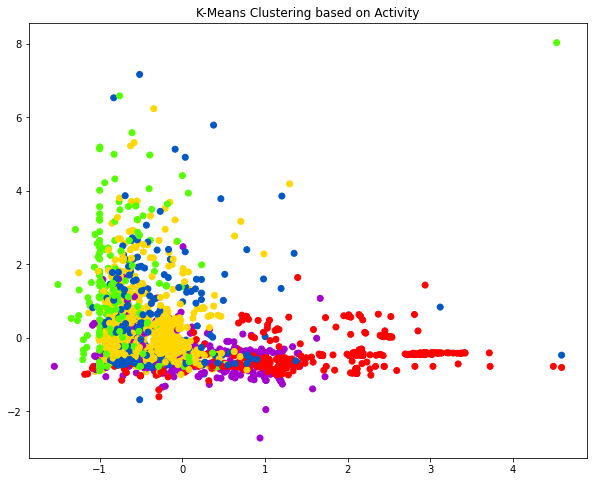

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(df_std.iloc[:,21], df_std.iloc[:,31],c=cluster, cmap='prism')  # plot points with cluster dependent colors
plt.title('K-Means Clustering based on Activity')
plt.show()

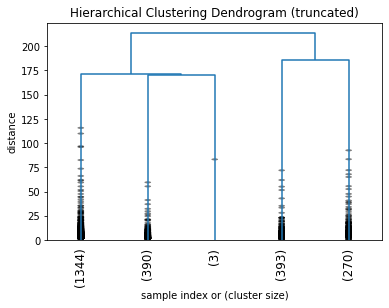

In [16]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2_standardized = df_std
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(dataset2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

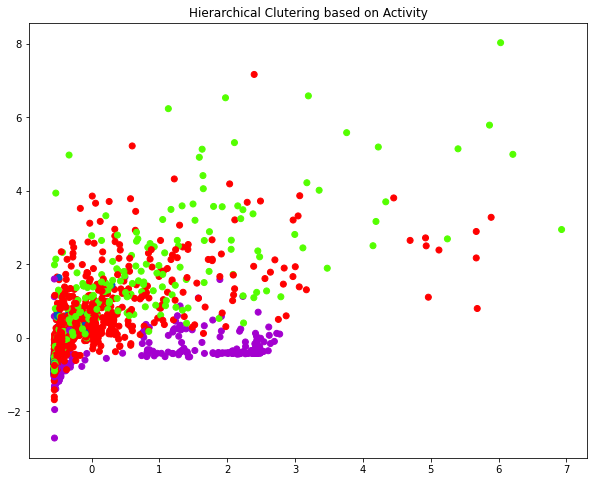

In [27]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(dataset2_standardized.iloc[:,25], dataset2_standardized.iloc[:,31],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Hierarchical Clutering based on Activity')
plt.show()